<a href="https://colab.research.google.com/github/GENNYB7/FoodSale_Forecast/blob/main/Forecast_FoodSale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split

filename = '/content/drive/MyDrive/Coding_Dojo/PandasForDataManipulation/sales_predictions.xlsx'
forecast_df = pd.read_excel(filename)
forecast_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
forecast_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
forecast_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [6]:
forecast_df['Item_Weight'].isna().head(20)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
Name: Item_Weight, dtype: bool

In [7]:
Item_Weight_missing = forecast_df['Item_Weight'].isna()
forecast_df.loc[Item_Weight_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [8]:
forecast_df['Outlet_Size'].isna().head()

0    False
1    False
2    False
3     True
4    False
Name: Outlet_Size, dtype: bool

In [9]:
Outlet_Size_missing = forecast_df['Outlet_Size'].isna()
forecast_df.loc[Outlet_Size_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [10]:
forecast_df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [11]:
forecast_df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [12]:
forecast_df['Outlet_Identifier'].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [13]:
forecast_df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [14]:
#Filling in missing values for outlet size
forecast_df['Outlet_Size'].fillna("Medium", inplace = True)

In [15]:
forecast_df['Outlet_Size'].isnull().sum()

0

In [16]:
#fill missing values for weight. code reference: https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

forecast_df['Item_Weight'] = forecast_df['Item_Weight'].interpolate()
forecast_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [17]:
forecast_df['Item_Weight'].isnull().sum()

0

In [18]:
#replacements on items fat content. Reference: https://www.kite.com/python/answers/how-to-replace-column-values-in-a-pandas-dataframe-in-python
forecast_df["Item_Fat_Content"].replace({"LF":"Low Fat", "reg":"Regular", "low fat":"Low Fat"}, inplace=True)
print(forecast_df)


     Item_Identifier  Item_Weight  ...        Outlet_Type  Item_Outlet_Sales
0              FDA15        9.300  ...  Supermarket Type1          3735.1380
1              DRC01        5.920  ...  Supermarket Type2           443.4228
2              FDN15       17.500  ...  Supermarket Type1          2097.2700
3              FDX07       19.200  ...      Grocery Store           732.3800
4              NCD19        8.930  ...  Supermarket Type1           994.7052
...              ...          ...  ...                ...                ...
8518           FDF22        6.865  ...  Supermarket Type1          2778.3834
8519           FDS36        8.380  ...  Supermarket Type1           549.2850
8520           NCJ29       10.600  ...  Supermarket Type1          1193.1136
8521           FDN46        7.210  ...  Supermarket Type2          1845.5976
8522           DRG01       14.800  ...  Supermarket Type1           765.6700

[8523 rows x 12 columns]


In [19]:
forecast_df["Item_Fat_Content"].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
forecast_df['Item_Visibility'].mean()

0.06613202877895127

In [21]:
#to replace the 0's i refered to:https://medium.com/analytics-vidhya/bigmart-dataset-sales-prediction-c1f1cdca9af1
forecast_df.Item_Visibility.replace(to_replace=0.000000,value=np.NaN, inplace=True)
forecast_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [22]:
#Fill in reference:https://medium.com/analytics-vidhya/bigmart-dataset-sales-prediction-c1f1cdca9af1

forecast_df['Item_Visibility'] = forecast_df['Item_Visibility'].fillna(forecast_df.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))
forecast_df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.016164,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
forecast_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
forecast_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.831222,0.070749,140.992782,1997.831867,2181.288914
std,4.445074,0.050313,62.275067,8.371760,1706.499616
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,9.000000,0.031395,93.826500,1987.000000,834.247400
50%,12.600000,0.058100,143.012800,1999.000000,1794.331000
75%,16.600000,0.098867,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [25]:
data = forecast_df.groupby(['Item_Type', 'Item_Visibility', 'Item_Weight', 'Outlet_Identifier' ,'Outlet_Location_Type'])[['Item_Outlet_Sales']].sum()
data

Item_Outlet_Sales
Item_Type     Item_Visibility Item_Weight Outlet_Identifier Outlet_Location_Type                   
Baking Goods  0.005639        7.842500    OUT027            Tier 3                        3146.5708
              0.005662        5.985000    OUT013            Tier 3                        2591.2936
              0.005678        5.985000    OUT045            Tier 2                        1665.8316
              0.006295        10.320000   OUT027            Tier 3                        3735.8038
              0.006336        6.635000    OUT049            Tier 1                        2048.6666
...                                                                                             ...
Starchy Foods 0.205605        7.435000    OUT010            Tier 3                         621.1914
              0.215612        13.500000   OUT010            Tier 3                          97.2068
              0.226123        17.700000   OUT010            Tier 3                         370.1848
              0.236536        18.516667   OUT019            Tier 1                         185.0924
              0.238366        7.600000    OUT010            Tier 3                         852.2240

[8523 rows x 1 columns]

In [26]:
Top5oulets = forecast_df.groupby(['Outlet_Identifier', 'Outlet_Location_Type'])['Item_Outlet_Sales'].count().sort_values(ascending=False).head(5)
Top5oulets

Outlet_Identifier  Outlet_Location_Type
OUT027             Tier 3                  935
OUT013             Tier 3                  932
OUT049             Tier 1                  930
OUT046             Tier 1                  930
OUT035             Tier 2                  930
Name: Item_Outlet_Sales, dtype: int64

In [27]:
ItemsVis = forecast_df.groupby(['Item_Type', 'Item_Visibility', 'Outlet_Location_Type']).sum()
ItemsVis

Item_Weight  ...  Item_Outlet_Sales
Item_Type     Item_Visibility Outlet_Location_Type               ...                   
Baking Goods  0.005639        Tier 3                   7.842500  ...          3146.5708
              0.005662        Tier 3                   5.985000  ...          2591.2936
              0.005678        Tier 2                   5.985000  ...          1665.8316
              0.006295        Tier 3                  10.320000  ...          3735.8038
              0.006336        Tier 1                   6.635000  ...          2048.6666
...                                                         ...  ...                ...
Starchy Foods 0.205605        Tier 3                   7.435000  ...           621.1914
              0.215612        Tier 3                  13.500000  ...            97.2068
              0.226123        Tier 3                  17.700000  ...           370.1848
              0.236536        Tier 1                  18.516667  ...           185.0924
              0.238366        Tier 3                   7.600000  ...           852.2240

[8487 rows x 4 columns]

VISUALIZATIONS




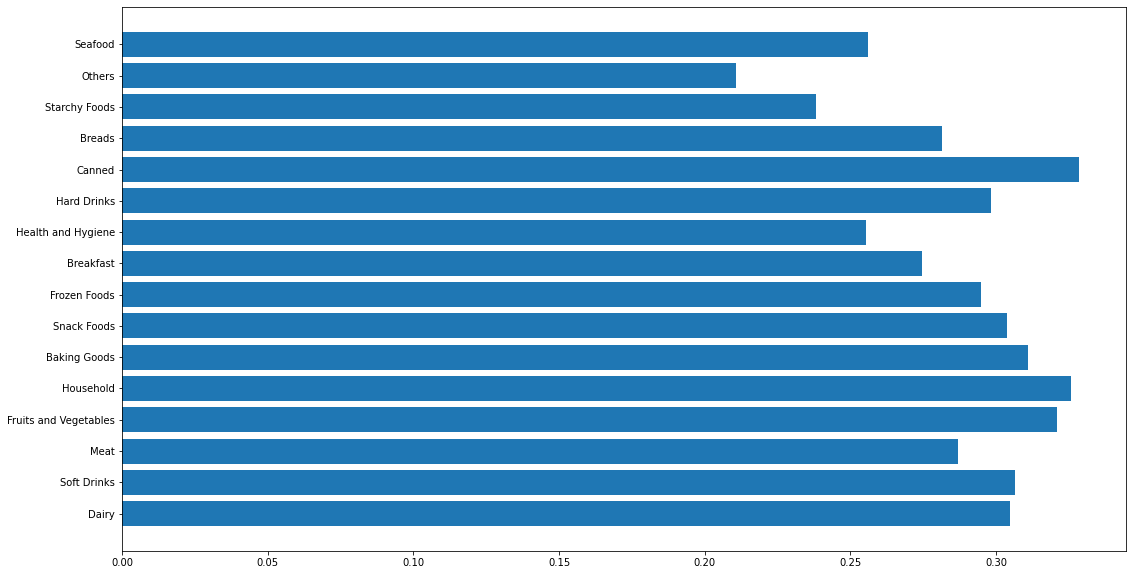

In [28]:
ITYPE = forecast_df['Item_Type']
IVIS = forecast_df['Item_Visibility']

fig = plt.figure(figsize = (18,10))
plt.barh(ITYPE,IVIS);

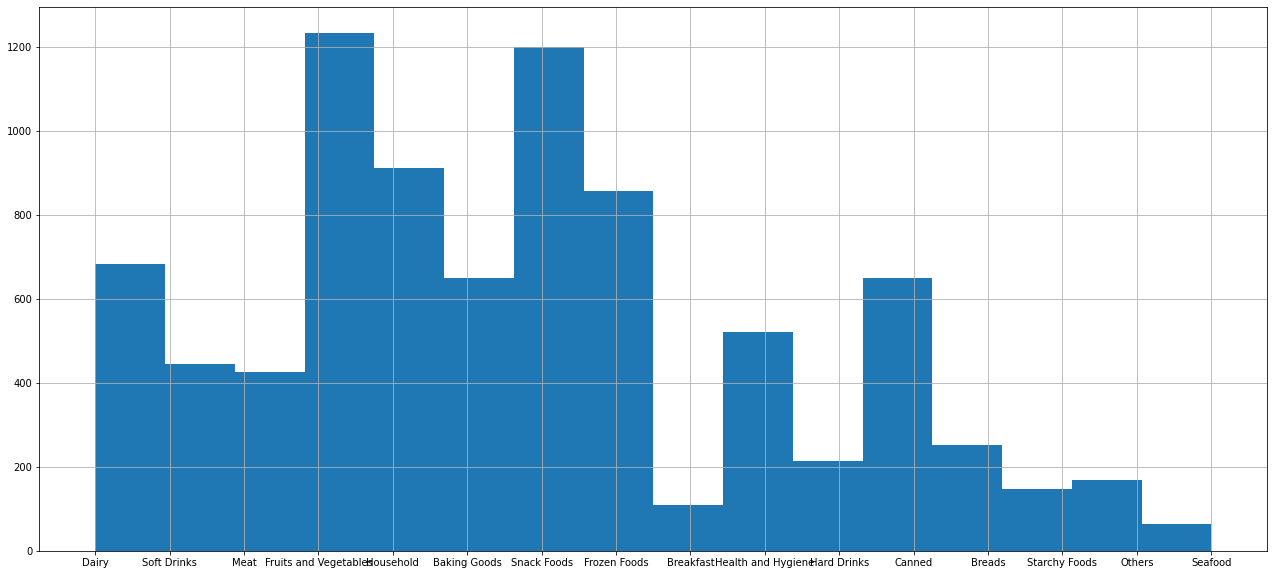

In [29]:
fig, ax = plt.subplots(figsize =(22,10))
forecast_df['Item_Type'].hist(bins = 16);

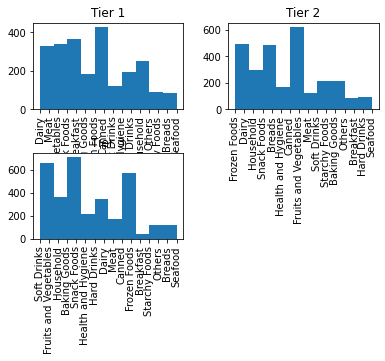

In [30]:
forecast_df.hist(column="Item_Type", by="Outlet_Location_Type");

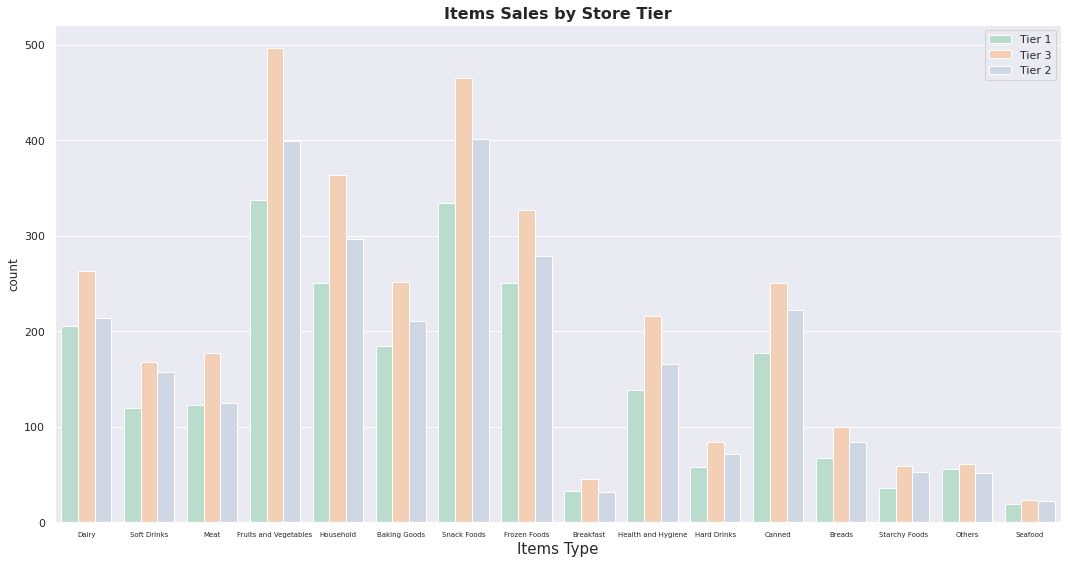

In [31]:
#I was stuck again on starting my graphs, and I refered to my belt exam file to help me as well documentations.

sns.set_theme(style="darkgrid")
countplot, ax = plt.subplots(figsize = (15,8))
ax = sns.countplot(x='Item_Type', hue='Outlet_Location_Type', data=forecast_df, palette='Pastel2')
ax.set_title('Items Sales by Store Tier',fontsize = 16, fontweight='bold' )
ax.set_xlabel('Items Type', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.legend()
plt.show()

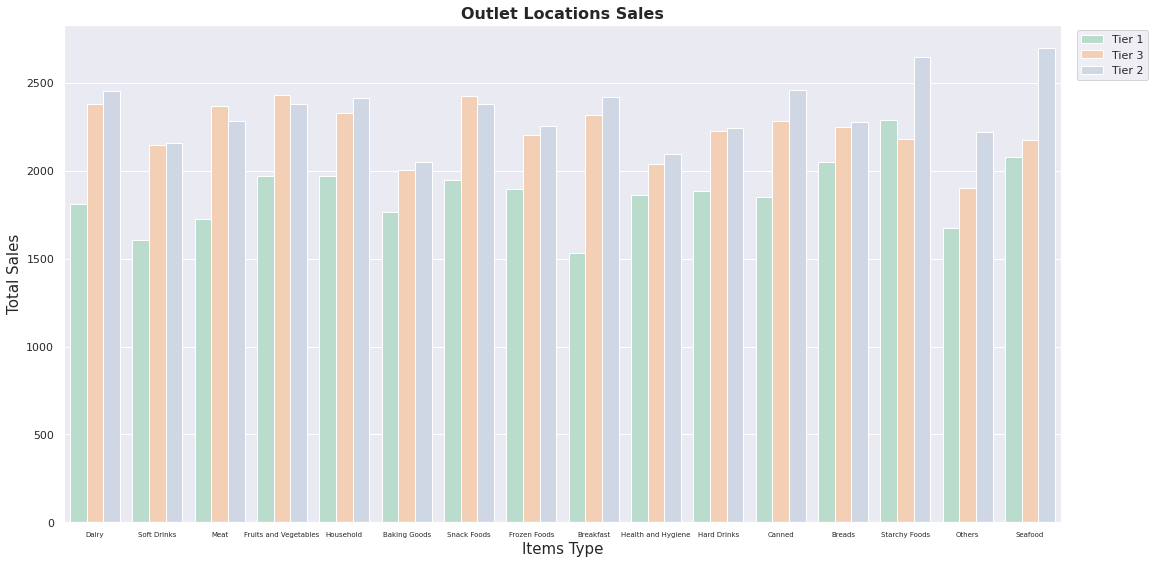

In [32]:
sns.set_theme(style="darkgrid")
barplot, ax = plt.subplots(figsize = (15,8))
ax = sns.barplot(x='Item_Type', y='Item_Outlet_Sales', hue='Outlet_Location_Type', data= forecast_df, ci=None, palette='Pastel2')
ax.set_title('Outlet Locations Sales',fontsize = 16, fontweight='bold' )
ax.set_xlabel('Items Type', fontsize = 15)
ax.set_ylabel('Total Sales', fontsize = 15)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.legend(bbox_to_anchor=(1.01, 1))
plt.show()

HISTOGRAMS 

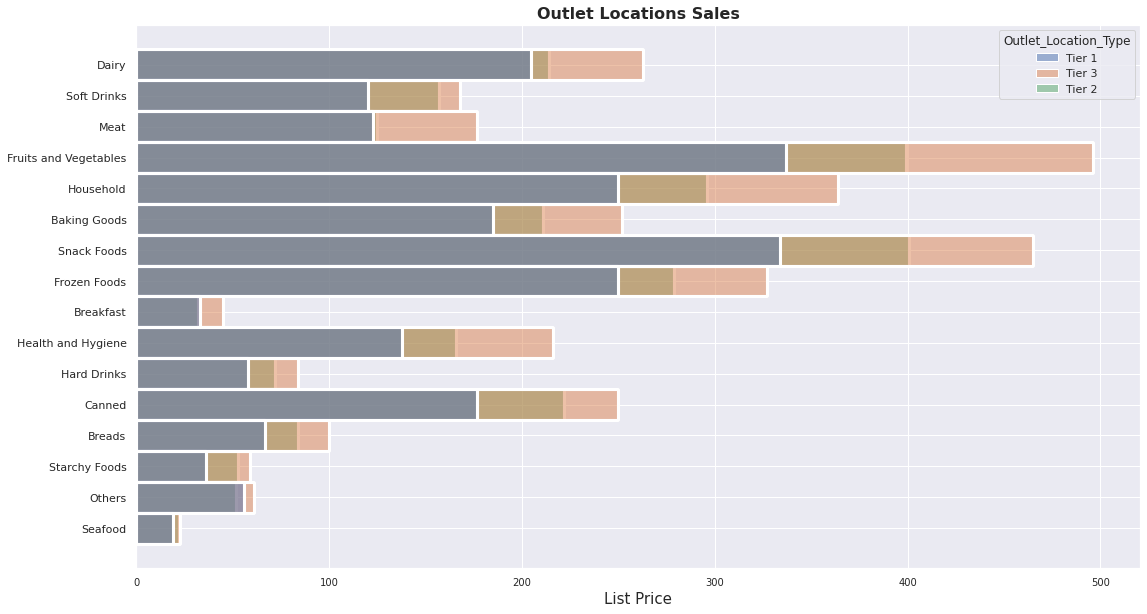

In [33]:
sns.set_theme(style="darkgrid")
histplot, ax = plt.subplots(figsize = (18,10))
sns.histplot(data=forecast_df, y='Item_Type', hue='Outlet_Location_Type')
plt.title('Categories Sales by Store Tier',fontsize = 16, fontweight='bold' )
plt.xlabel('List Price', fontsize = 15)
ax.set_title('Outlet Locations Sales',fontsize = 16, fontweight='bold' )
ax.set_xlabel('List Price', fontsize = 15)
ax.set_ylabel(None)
plt.xticks(fontsize=10);

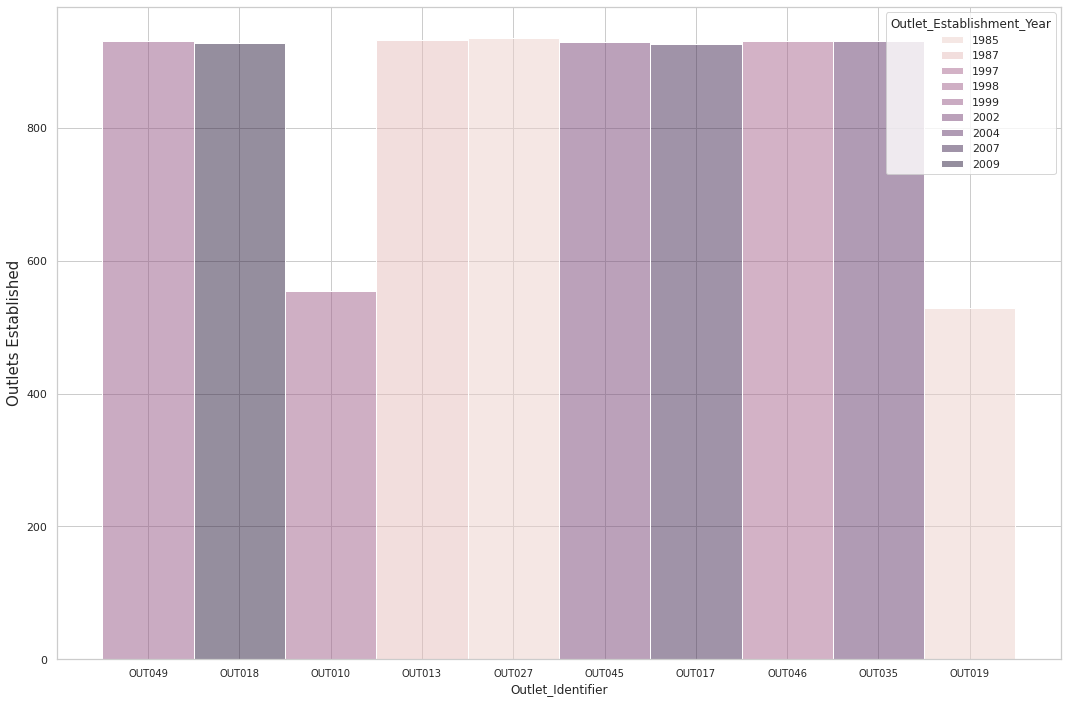

In [34]:
#I'm having a really hard time setting the legend to be outside the plot =(
sns.set_theme(style="whitegrid")
histplot, ax = plt.subplots(figsize = (18,12))
sns.histplot(data=forecast_df, x='Outlet_Identifier', hue='Outlet_Establishment_Year')
plt.ylabel('Outlets Established', fontsize = 15)
plt.xticks(fontsize=10);

BOXPLOTS

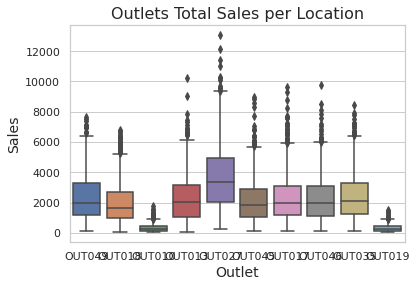

In [35]:
boxplot = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=forecast_df)
boxplot.axes.set_title("Outlets Total Sales per Location", fontsize=16)
boxplot.set_xlabel("Outlet", fontsize=14)
boxplot.set_ylabel("Sales", fontsize=14);

HEATMAP


In [36]:
forecast_df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.019797,0.024839,0.001220,0.014536
Item_Visibility,-0.019797,1.000000,-0.005951,-0.075238,-0.126026
Item_MRP,0.024839,-0.005951,1.000000,0.005020,0.567574
Outlet_Establishment_Year,0.001220,-0.075238,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014536,-0.126026,0.567574,-0.049135,1.000000


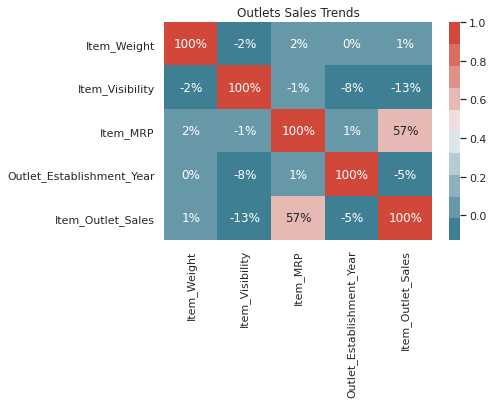

In [37]:
ax = plt.axes()
sns.heatmap(data = forecast_df.corr(), annot=True, fmt=".0%", cmap=sns.diverging_palette(220, 15, n=10))
ax.set_title('Outlets Sales Trends');

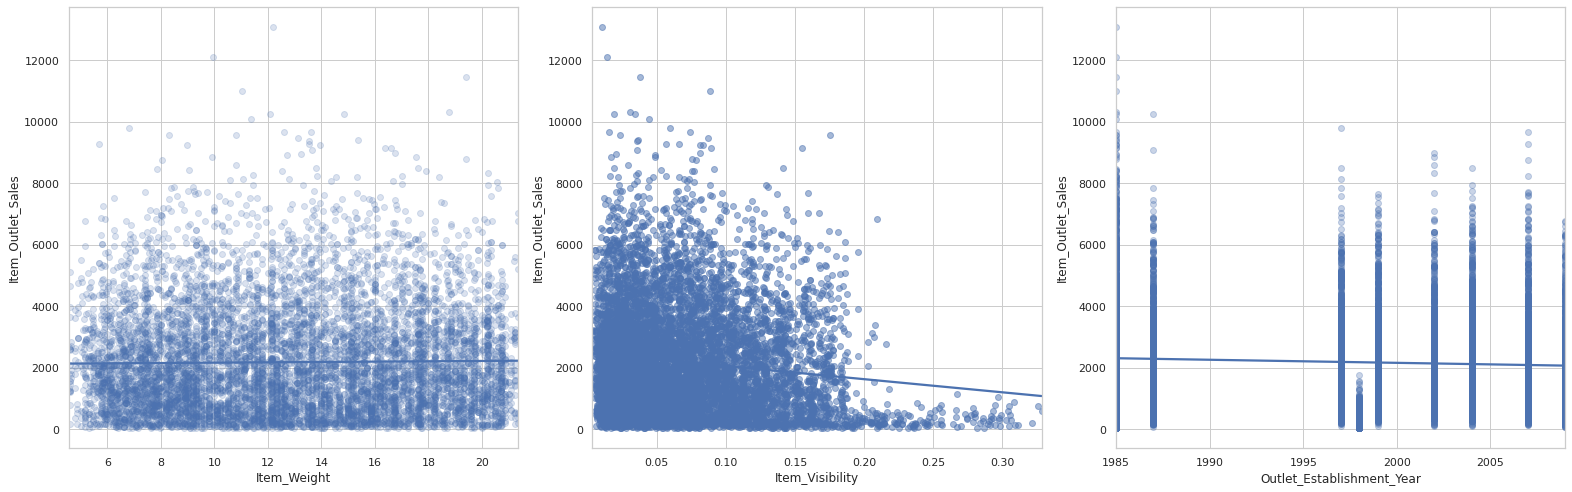

In [38]:
#from linear regression class
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (22,7))
sns.regplot(x="Item_Weight", y="Item_Outlet_Sales", data=forecast_df, ci=None, ax = axes[0], scatter_kws={'alpha':0.2});
sns.regplot(x="Item_Visibility", y="Item_Outlet_Sales", data=forecast_df, ci=None, ax = axes[1], scatter_kws={'alpha':0.5});
sns.regplot(x="Outlet_Establishment_Year", y="Item_Outlet_Sales", data=forecast_df, ci=None, ax = axes[2], scatter_kws={'alpha':0.3});
fig.tight_layout()

In [39]:
forecast_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [40]:
pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


PART 5 - MACHINE LEARNING

In [41]:
# import linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [42]:
forecast_df.shape

(8523, 12)

In [43]:
#reference used to transform nominal; attibutes: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
itemstypes = np.unique(forecast_df['Item_Type'])
itemstypes

array(['Baking Goods', 'Breads', 'Breakfast', 'Canned', 'Dairy',
       'Frozen Foods', 'Fruits and Vegetables', 'Hard Drinks',
       'Health and Hygiene', 'Household', 'Meat', 'Others', 'Seafood',
       'Snack Foods', 'Soft Drinks', 'Starchy Foods'], dtype=object)

In [ ]:
pip install category_encoders

In [ ]:
# Generate labels for each category reference: https://towardsdatascience.com/understanding-feature-engineering-part-2-categorical-data-f54324193e63
gle = LabelEncoder()
itemtype_labels = gle.fit_transform(forecast_df['Item_Type'])
itemtype_mappings = {index: label for index, label in 
                     enumerate(gle.classes_)}
itemtype_mappings

In [46]:
forecast_df['Item_TypeLabel'] = itemtype_labels
forecast_df[['Item_Weight', 'Item_Visibility', 'Item_Type', 'Item_TypeLabel' ]].iloc[1:]

,Item_Weight,Item_Visibility,Item_Type,Item_TypeLabel
1,5.920,0.019278,Soft Drinks,14
2,17.500,0.016760,Meat,10
3,19.200,0.022911,Fruits and Vegetables,6
4,8.930,0.016164,Household,9
5,10.395,0.091392,Baking Goods,0
...,...,...,...,...
8518,6.865,0.056783,Snack Foods,13
8519,8.380,0.046982,Baking Goods,0
8520,10.600,0.035186,Health and Hygiene,8
8521,7.210,0.145221,Snack Foods,13


In [47]:
#arrange data into feature matrix and target vector
X = forecast_df.loc[:, ['Item_Weight', 'Item_Visibility', 'Item_TypeLabel', 'Item_MRP', 'Outlet_Establishment_Year']].values

In [48]:
X.shape


(8523, 5)

In [49]:
Y = forecast_df.loc[:, 'Item_Outlet_Sales'].values

In [50]:
Y.shape

(8523,)

In [51]:
# per lesson: this is called instantiate the model
#do it everytime when using sklearn

reg = LinearRegression(fit_intercept = True)

In [52]:
#fit model this is the machine learning how to best predict our Y
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
reg.predict(X[0].reshape(-1, 5)) 

array([4106.23154243])

In [116]:
reg.predict(X[0:100])

array([4106.23154243,  809.18853882, 2399.39165612, 3024.04534782,
       1196.75059228,  579.71676188, 1256.71324183, 1563.3999293 ,
       1682.07850815, 2693.21327296,  465.25284514, 2354.19360542,
       2111.39035219, 1943.37555078, 3191.88242591,  899.59949935,
       1910.12671646,  842.94708549, 2071.22848417, 3366.89318463,
       3714.20918429, 2566.88058992, 3156.08129945, 1899.79796049,
       2764.59950029,  456.96702353,  575.52665223,  957.07514807,
        315.3957936 ,  833.7293858 ,  427.56721598, 1298.82341449,
       3682.08230287,  990.79411648, 2579.78449441, 2175.21875229,
       2195.58707693, 1555.73001381,  485.07496163, 1689.43059607,
       3456.18615687, 2269.01204548, 2754.36617237, 3902.69586105,
       2226.80674029, 2688.00470285, 2498.01479504, 4267.8434781 ,
        738.94789489, 2421.4930319 , 2251.24804021, 1947.65195023,
       2140.14915219, 2956.70732015, 2406.67381996, 3971.91892806,
       1683.08012032,  564.6077852 , 2562.35285932, 3002.50862

In [117]:
score = reg.score(X, Y)
print(score)

0.34099814426989283


In [56]:
reg.coef_

array([-7.00186798e-01, -4.32767277e+03, -2.64703012e+00,  1.55477666e+01,
       -1.25460119e+01])

In [57]:
reg.intercept_

25388.28149958246

In [58]:
#followed lesson for reference
m1 = reg.coef_[0]
m2 = reg.coef_[1]
m3 = reg.coef_[2]
m4 = reg.coef_[3]
m5 = reg.coef_[4]
b = reg.intercept_

print("formula: y = {:.2f}*Item_Weight + {:.2f}*Item_Visibility + {:.2f}*Item_TypeLabel + {:.2f}*Item_MRP + {:.2f}*Outlet_Establishment_Year + {:.2f}".format(m1, m2, m3, m4, m5, b))

formula: y = -0.70*Item_Weight + -4327.67*Item_Visibility + -2.65*Item_TypeLabel + 15.55*Item_MRP + -12.55*Outlet_Establishment_Year + 25388.28


In [118]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=None)

In [110]:
#Followig feedback, fitting a KNN model
#standardizing data

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [127]:
#instanciate the model
knn_reg = KNeighborsRegressor(n_neighbors=1)
knn_reg.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')

In [128]:
print(knn_reg)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                    weights='uniform')


In [129]:
preds = knn_reg.predict(X_train)

In [130]:
preds

array([2356.932 ,  428.7752, 2011.3818, ..., 1970.768 ,   42.6112,
       6705.2718])

In [131]:
test_preds = knn_reg.predict(X_test)

In [132]:
knn_reg.score(X_train, Y_train)

1.0

In [102]:
#knn_reg.score(X,Y)

CODE GRAVEYARD


In [103]:
#forecast_df.describe()

In [104]:
#replaced all 0 values for Item_Visibility
#forecast_df.loc[forecast_df['Item_Visibility'] <= 0] = 0.066132
#forecast_df.head(50)

In [105]:
#forecast_df['Item_Type'] = forecast_df['Item_Type'].convert_objects(convert_numeric = True)

In [106]:
#forecast_df.fillna(forecast_df.mean()["Outlet_Location_Type":"Outlet_Type"])

In [107]:
#itempopularity = forecast_df['Item_Visibility']
#Sales = forecast_df['Item_Outlet_Sales']
#index = ['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods', 
         # 'Dairy', 'Canned', 'Baking Goods', 'Health and Hygiene', 'Soft Drinks',
          #'Meat', 'Breads','Hard Drinks','Others', 'Starchy Foods','Breakfast',
          #'Seafood']
#new_forecast_df = pd.DataFrame({'Sales': Sales,
                               #'Visibility': itempopularity}, index = index)
#ax = new_forecast_df.plot.bar()

In [108]:
#forecast_df[['Item_Visibility']].to_numpy()